# Tweet Emotion Classification 

TEXT PREPROCESSING PENGANTAR PEMROSESAN DATA MULTIMEDIA
KLASIFIKASI TEKS PADA KLASIFIKASI EMOSI DATA TEXT TWITTER

Kelompok II
Kelas C

Ni Putu Dita Ari Pratiwi 		    (2208561003)
Putu Ardi Sudarmika 			    (2208561028)
Dominggo Pratama Sidauruk 		    (2208561092)
I Gede Putu Mahasatya Katyayana 	(2208561116)

Dataset
Dalam proyek ini saya menggunakan 4.403 tweet berbahasa Indonesia yang telah dikategorikan ke dalam 5 kategori, yaitu anger, happy, sadness, fear, and love.
kredit dataset: https://github.com/meisaputri21/Indonesian-Twitter-Emotion-Dataset 


# IMPORT LIBRARY

In [25]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# DATA ACQUISITION

In [26]:
pd.options.display.max_colwidth = 500

In [27]:
df = pd.read_csv('Twitter_Emotion_Dataset.csv')
df.head(10)

,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernur .Emangny polisi tdk ikut pmbhasan? Jgn berpolitik. Pengaturan wilayah,hak gubernur. Persoalan Tn Abang soal turun temurun.Pelik.Perlu kesabaran. [USERNAME] [USERNAME] [URL]"
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebih rasain lah yang harus sibuk jaga diri, rasain sakitnya haid, dan paniknya pulang malem sendirian. Gimana orang asing? Wajarlah banyak korban yang takut curhat, bukan dibela malah dihujat."
2,happy,"Kepingin gudeg mbarek Bu hj. Amad Foto dari google, sengaja, biar teman-teman jg membayangkannya. Berbagi itu indah."
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Pengaturan wilayah tgg jwb dan wwnang gub.Tng Abng soal rumit,sejak gub2 , trdahulu.Skrg sedng dibenahi,agr bermnfaat semua pihak.Mohon yg punya otak,berpikirlah dgn wajar,kecuali otaknya butek.Ya kamu. [URL]"
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 batalin tiket di stasiun pasar senen, lancar, antrian tidak terlalu rame,15 menitan dan beress semua! Mungkin bisa dicoba twips, di jam-jam segitu cc [USERNAME]"
5,anger,"Dari sekian banyak thread yang aku baca, thread ini paling aneh sih dalam penulisan. Sumpah aneh bgt, mau ngatain ""lebay"" aja segala bikin thread hadeh. Aku juga ga jago nulis, tapi tulisan aku ga seberantakan thread mbaknya."
6,happy,Sharing sama temen tuh emg guna bgt. Disaat lu ngerasa masalah lu berat bgt ternyata temen kita sendiri punya masalah lebih berat dr kita. Malah masalah kita ngga ada apa2nya dibanding masalah dia.
7,sadness,"Orang lain kalau pake ponco itu buat jas hujan, nah dia pake buat kasur. Ya tadi gara2 saking gak punya apa2. Mamak bilang, kami tuh di awal pernikan gak ada ngalamin bulan madu kayak skrg2. Org tidur nya aja pake ponco. Gimane mau bulan madu."
8,anger,"Contoh mereka yg gemar menyudutkan, teriak paling toleran tp gemar menuduh, gemar men-judge seseorang berdasarkan versi mereka. Cukup tau saja."
9,sadness,Pulang udah H-4 lebaran dilema sekali. Seperti tidak bisa melakukan apa2 dirumah sebelum lebaran. Buka puasa bareng cuman 3 hari sama keluarga begitu juga sahur.


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4401 entries, 0 to 4400
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   4401 non-null   object
 1   tweet   4401 non-null   object
dtypes: object(2)
memory usage: 68.9+ KB


In [29]:
# Data is imbalance, there is difference count in each label
df['label'].value_counts()

label
anger      1101
happy      1017
sadness     997
fear        649
love        637
Name: count, dtype: int64

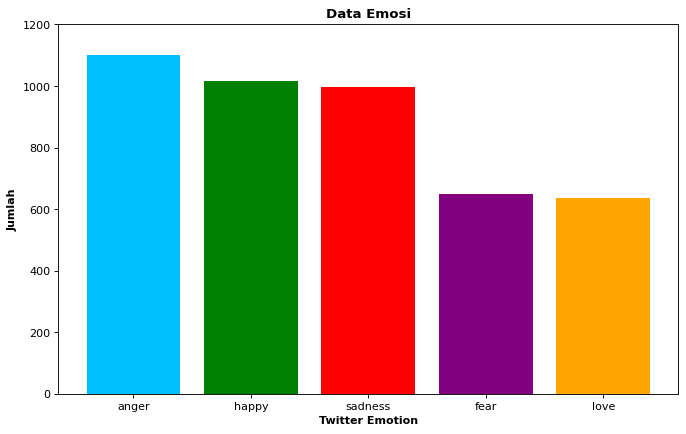

In [30]:
# Hitung jumlah setiap label
height = df['label'].value_counts()

# Buat labels dari indeks height
labels = height.index

# Posisi y untuk setiap label
y_pos = np.arange(len(labels))

# Membuat plot
plt.figure(figsize=(10, 6), dpi=80)
plt.ylim(0, max(height) + 100)
plt.title('Data Emosi', fontweight='bold')
plt.xlabel('Twitter Emotion', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['deepskyblue', 'green', 'red', 'purple', 'orange'])
plt.xticks(y_pos, labels)
plt.show()

Label Encoding

In [31]:
le = LabelEncoder()
df['label_id'] = le.fit_transform(df['label'])

In [32]:
df

,label,tweet,label_id
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernur .Emangny polisi tdk ikut pmbhasan? Jgn berpolitik. Pengaturan wilayah,hak gubernur. Persoalan Tn Abang soal turun temurun.Pelik.Perlu kesabaran. [USERNAME] [USERNAME] [URL]",0
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebih rasain lah yang harus sibuk jaga diri, rasain sakitnya haid, dan paniknya pulang malem sendirian. Gimana orang asing? Wajarlah banyak korban yang takut curhat, bukan dibela malah dihujat.",0
2,happy,"Kepingin gudeg mbarek Bu hj. Amad Foto dari google, sengaja, biar teman-teman jg membayangkannya. Berbagi itu indah.",2
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Pengaturan wilayah tgg jwb dan wwnang gub.Tng Abng soal rumit,sejak gub2 , trdahulu.Skrg sedng dibenahi,agr bermnfaat semua pihak.Mohon yg punya otak,berpikirlah dgn wajar,kecuali otaknya butek.Ya kamu. [URL]",0
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 batalin tiket di stasiun pasar senen, lancar, antrian tidak terlalu rame,15 menitan dan beress semua! Mungkin bisa dicoba twips, di jam-jam segitu cc [USERNAME]",2
...,...,...,...
4396,love,"Tahukah kamu, bahwa saat itu papa memejamkan matanya dan menahan gejolak dan batinnya. Bahwa papa sangat ingin mengikuti keinginanmu tapu lagi-lagi dia HARUS menjagamu?",3
4397,fear,Sulitnya menetapkan Calon Wapresnya Jokowi di Pilpres 2019 salah satunya disebabkan gemuknya partai koalisi yang mengusung petahana. Sehingga sikap kehati-hatian agar tidak ada yang terluka dari partai pengusung harus tetap dijaga #Pilpres2019 #Pilpres #Jokowi #Parpol,1
4398,anger,"5. masa depannya nggak jelas. lha iya, gimana mau jelas coba? lulusan seni, bisanya cuma nari, mau kerja apa? nari-nari doang. berapa sih, penghasilannya penari? kerja juga gak tetap~ #dontdateadancer",0
4399,happy,"[USERNAME] dulu beneran ada mahasiswa Teknik UI nembak pacarnya pas sahur di Kukusan Teknik Depok, diliput kru Katakan Cinta (dan belum pacaran mereka). Sekarang udah nikah dan punya anak. Pernah diceritain laman UI Shitposting/Divarposting juga.",2


#  TEXT PREPROCESSING

case folding

In [33]:
# membuat fungsi untuk case folding
def casefolding(text):
    text = text.lower()                                 # merubah kalimat menjadi huruf kecil
    text = re.sub(r'https?://\S+|www\.\S+', '', text)   # menghapus url dari kalimat
    text = re.sub(r'[-+]?[0-9]+', '', text)             # menghapus angka dari kalimat
    text = re.sub(r'[^\w\s]', '', text)                 # menghapus tanda baca
    text = text.strip()
    return text

In [34]:
# membandingkan before dan after case folding
raw_sample = df['tweet'].iloc[2]
case_folding = casefolding(raw_sample)

print('Raw data\t : ',raw_sample)
print('Case Folding\t :', case_folding)

Raw data	 :  Kepingin gudeg mbarek Bu hj. Amad Foto dari google, sengaja, biar teman-teman jg membayangkannya. Berbagi itu indah.
Case Folding	 : kepingin gudeg mbarek bu hj amad foto dari google sengaja biar temanteman jg membayangkannya berbagi itu indah


# Word Normalization

In [35]:
# Download corpus kumpulan slangword dan pisahkan kolomnya
key_norm = pd.read_csv("kamus_singkatan.csv")
key_norm[['singkat', 'hasil']] = key_norm['singkat;hasil'].str.split(';', expand=True)
key_norm = key_norm.drop(columns=['singkat;hasil'])
print(key_norm.head())

   singkat     hasil
0   aamiin     amin 
1     adek     adik 
2     adlh   adalah 
3      aer      air 
4  aiskrim  es krim 


In [36]:
def text_normalize(text):
    words = text.split()
    normalized_words = []
    for word in words:
        if word in key_norm['singkat'].values:
            normalized_word = key_norm[key_norm['singkat'] == word]['hasil'].values[0]
            normalized_words.append(normalized_word)
        else:
            normalized_words.append(word)
    return ' '.join(normalized_words).lower()

In [37]:
raw_data = df['tweet'].iloc[2]
word_normal = text_normalize(case_folding)

print('Raw Data\t :', raw_data)
print('Word Normalize\t :', word_normal)

Raw Data	 : Kepingin gudeg mbarek Bu hj. Amad Foto dari google, sengaja, biar teman-teman jg membayangkannya. Berbagi itu indah.
Word Normalize	 : kepingin gudeg mbarek bu hj amad foto dari google sengaja biar temanteman juga  membayangkannya berbagi itu indah


# filtering (Stopword Removal)

In [38]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

len(stopwords_ind)

758

In [39]:
#lihat daftar stopword yang disediakan NLTK
stopwords_ind[:20]

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara']

In [40]:
# menambahkan kata dalam stopword
more_stopword = ['tsel', 'gb', 'rb', 'btw']
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_word(text):
    clean_words = []
    text = text.split()
    for word in text:
        if word not in stopwords_ind:
            clean_words.append(word)
    return " ".join(clean_words)

In [41]:
# Processing the raw sample
raw_sample = df['tweet'].iloc[2]
case_folding_result = casefolding(raw_sample)
normalization_result = text_normalize(case_folding_result)
stopword_removal_result = remove_stop_word(normalization_result)

# Printing the results
print('Raw Data \t\t :', raw_sample)
print('Case Folding \t\t :', case_folding_result)
print('Normalization \t\t :', normalization_result)
print('Stopword Removal \t :', stopword_removal_result)

Raw Data 		 : Kepingin gudeg mbarek Bu hj. Amad Foto dari google, sengaja, biar teman-teman jg membayangkannya. Berbagi itu indah.
Case Folding 		 : kepingin gudeg mbarek bu hj amad foto dari google sengaja biar temanteman jg membayangkannya berbagi itu indah
Normalization 		 : kepingin gudeg mbarek bu hj amad foto dari google sengaja biar temanteman juga  membayangkannya berbagi itu indah
Stopword Removal 	 : kepingin gudeg mbarek bu hj amad foto google sengaja biar temanteman membayangkannya berbagi indah


# Stemming

In [42]:
# merubah kata menjadi kata dasar
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# membuat fungsi untuk stemming bahasa indonesia
def stemming(text):
    text = stemmer.stem(text)
    return text

In [43]:
raw_sample = df['tweet'].iloc[7]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_word(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw Data \t\t :', raw_sample)
print('Case Folding \t\t :', case_folding)
print('Stopword Removal \t\t :', stopword_removal)
print('Stemming \t\t :', text_stemming)

Raw Data 		 : Orang lain kalau pake ponco itu buat jas hujan, nah dia pake buat kasur. Ya tadi gara2 saking gak punya apa2. Mamak bilang, kami tuh di awal pernikan gak ada ngalamin bulan madu kayak skrg2. Org tidur nya aja pake ponco. Gimane mau bulan madu.
Case Folding 		 : orang lain kalau pake ponco itu buat jas hujan nah dia pake buat kasur ya tadi gara saking gak punya apa mamak bilang kami tuh di awal pernikan gak ada ngalamin bulan madu kayak skrg org tidur nya aja pake ponco gimane mau bulan madu
Stopword Removal 		 : orang pake ponco jas hujan pake kasur ya gara saking gak mamak bilang tuh pernikan gak ngalamin madu kayak skrg org tidur nya aja pake ponco gimane madu
Stemming 		 : orang pake ponco jas hujan pake kasur ya gara saking gak mamak bilang tuh pernik gak ngalamin madu kayak skrg org tidur nya aja pake ponco gimane madu


# text preprocessing pipeline

In [44]:
def text_preprocessing_process(text):
    text = casefolding(text)
    text = text_normalize(text)
    text = remove_stop_word(text)
    text = stemming(text)
    return text

In [45]:
%%time
df['clean_teks']= df['tweet'].apply(text_preprocessing_process)

CPU times: total: 5min 45s
Wall time: 17min 51s


In [46]:
df

,label,tweet,label_id,clean_teks
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernur .Emangny polisi tdk ikut pmbhasan? Jgn berpolitik. Pengaturan wilayah,hak gubernur. Persoalan Tn Abang soal turun temurun.Pelik.Perlu kesabaran. [USERNAME] [USERNAME] [URL]",0,jalan jatibarupolisi gertak gubernur emangny polisi pmbhasan politik atur wilayahhak gubernur tn abang turun temurunpelikperlu sabar username username url
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebih rasain lah yang harus sibuk jaga diri, rasain sakitnya haid, dan paniknya pulang malem sendirian. Gimana orang asing? Wajarlah banyak korban yang takut curhat, bukan dibela malah dihujat.",0,cewek lho kayak rasain sibuk jaga rasain sakit haid panik pulang malam gimana orang asing wajar korban takut curhat bela hujat
2,happy,"Kepingin gudeg mbarek Bu hj. Amad Foto dari google, sengaja, biar teman-teman jg membayangkannya. Berbagi itu indah.",2,kepingin gudeg mbarek bu hj amad foto google sengaja biar temanteman bayang bagi indah
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Pengaturan wilayah tgg jwb dan wwnang gub.Tng Abng soal rumit,sejak gub2 , trdahulu.Skrg sedng dibenahi,agr bermnfaat semua pihak.Mohon yg punya otak,berpikirlah dgn wajar,kecuali otaknya butek.Ya kamu. [URL]",0,jalan jatibarubagian wilayah tn abangpengaturan wilayah tgg wwnang gubtng abng rumitsejak gub trdahuluskrg sedng dibenahiagr bermnfaat pihakmohon otakberpikirlah wajarkecuali otak butekya url
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 batalin tiket di stasiun pasar senen, lancar, antrian tidak terlalu rame,15 menitan dan beress semua! Mungkin bisa dicoba twips, di jam-jam segitu cc [USERNAME]",2,sharing alam kemarin jam batalin tiket stasiun pasar senin lancar antri ramai menit beress coba twips jamjam segitu cc username
...,...,...,...,...
4396,love,"Tahukah kamu, bahwa saat itu papa memejamkan matanya dan menahan gejolak dan batinnya. Bahwa papa sangat ingin mengikuti keinginanmu tapu lagi-lagi dia HARUS menjagamu?",3,tahu papa mejam mata tahan gejolak batin papa ikut ingin tapu lagilagi jaga
4397,fear,Sulitnya menetapkan Calon Wapresnya Jokowi di Pilpres 2019 salah satunya disebabkan gemuknya partai koalisi yang mengusung petahana. Sehingga sikap kehati-hatian agar tidak ada yang terluka dari partai pengusung harus tetap dijaga #Pilpres2019 #Pilpres #Jokowi #Parpol,1,sulit tetap calon wapresnya jokowi pilpres salah satu sebab gemuk partai koalisi usung tahana sikap kehatihatian luka partai usung jaga pilpres pilpres jokowi parpol
4398,anger,"5. masa depannya nggak jelas. lha iya, gimana mau jelas coba? lulusan seni, bisanya cuma nari, mau kerja apa? nari-nari doang. berapa sih, penghasilannya penari? kerja juga gak tetap~ #dontdateadancer",0,depan lha iya gimana coba lulus seni bisa nari kerja narinari sih hasil tari kerja dontdateadancer
4399,happy,"[USERNAME] dulu beneran ada mahasiswa Teknik UI nembak pacarnya pas sahur di Kukusan Teknik Depok, diliput kru Katakan Cinta (dan belum pacaran mereka). Sekarang udah nikah dan punya anak. Pernah diceritain laman UI Shitposting/Divarposting juga.",2,username mahasiswa teknik ui nembak pacar pas sahur kukus teknik depok liput kru cinta pacar nikah anak diceritain laman ui shitpostingdivarposting


In [47]:
# simpan data yang sudah dipreprocessing ke dalam file csv
df.to_csv('clean_data.csv')

# Eksplor kata-kata yang paling sering muncul 

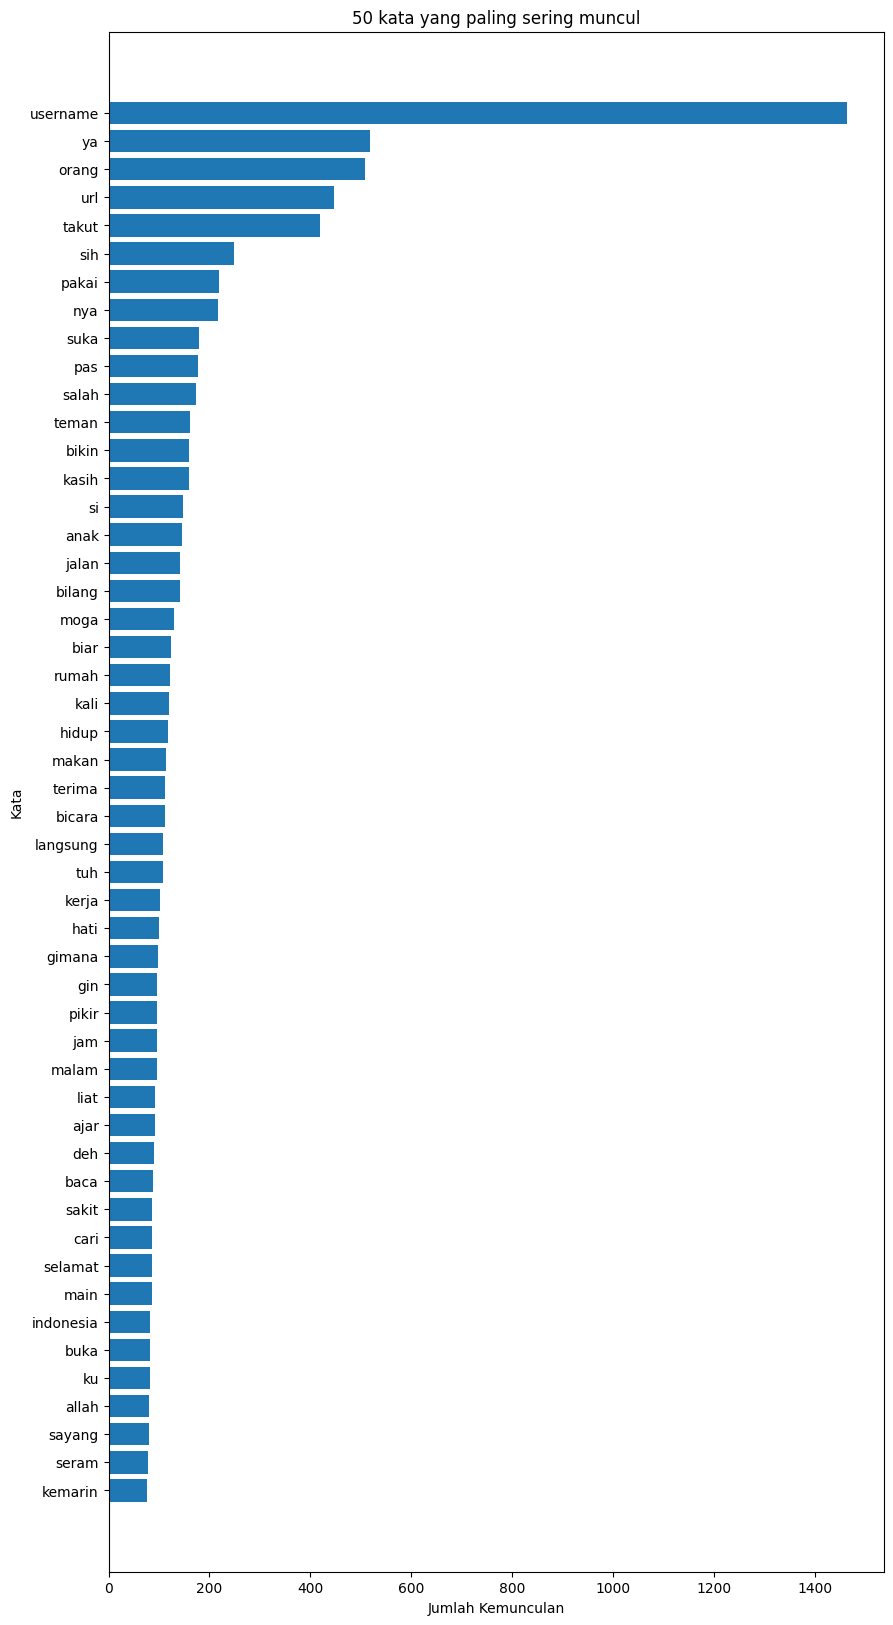

In [58]:
# Asumsikan 'df' adalah DataFrame
# Pastikan kolom 'label_id' sudah dalam format integer
df['label_id'] = df['label_id'].astype(int)

# Pastikan ada kolom 'clean_teks' yang berisi teks bersih
# Jika belum, tambahkan tahap pembersihan teks di sini

# Menggunakan CountVectorizer untuk menghitung jumlah kata
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df['clean_teks'])

# Menghitung jumlah kata untuk label_id kurang dari 3
filtered_indices = df['label_id'] < 3
filtered_counts = X_counts[filtered_indices]

# Menghitung jumlah total dari kata-kata yang difilter
all_word_count = np.asarray(filtered_counts.sum(axis=0)).flatten()

# Mendapatkan indeks dari 50 kata terbanyak
indices = np.argsort(all_word_count)[::-1][:50]

# Mendapatkan kata-kata yang sesuai dengan indeks tersebut
feature_names = np.array(count_vect.get_feature_names_out())
top_words = feature_names[indices]
top_counts = all_word_count[indices]

# Plotting
plt.figure(figsize=(10, 20))
plt.barh(np.arange(len(top_counts)), top_counts, align='edge', height=0.8)
plt.yticks(np.arange(len(top_counts)) + 0.4, top_words)
plt.gca().invert_yaxis()
plt.title('50 kata yang paling sering muncul')
plt.xlabel('Jumlah Kemunculan')
plt.ylabel('Kata')
plt.show()


# FEATURE ENGINEERING

In [59]:
df = pd.read_csv('clean_data.csv')

# Extract features and labels
X = df['clean_teks']
y = df['label']

In [60]:
X

0                                            jalan jatibarupolisi gertak gubernur emangny polisi pmbhasan politik atur wilayahhak gubernur tn abang turun temurunpelikperlu sabar username username url
1                                                                        cewek lho kayak rasain sibuk jaga rasain sakit haid panik pulang malam gimana orang asing wajar korban takut curhat bela hujat
2                                                                                                                kepingin gudeg mbarek bu hj amad foto google sengaja biar temanteman bayang bagi indah
3       jalan jatibarubagian wilayah tn abangpengaturan wilayah tgg wwnang gubtng abng rumitsejak gub trdahuluskrg sedng dibenahiagr bermnfaat pihakmohon otakberpikirlah wajarkecuali otak butekya url
4                                                                       sharing alam kemarin jam batalin tiket stasiun pasar senin lancar antri ramai menit beress coba twips jamjam segitu cc username


In [61]:
y

0         anger
1         anger
2         happy
3         anger
4         happy
         ...   
4396       love
4397       fear
4398      anger
4399      happy
4400    sadness
Name: label, Length: 4401, dtype: object

# Feature Extraction (TF-IDF dan N-Gram)

In [62]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Load your data into a DataFrame (replace 'clean_data.csv' with your actual file path)
df = pd.read_csv('clean_data.csv')

# Fill NaN values in the 'clean_text' column with an empty string
df['clean_teks'].fillna('', inplace=True)

# Create the TfidfVectorizer
vec_TF_IDF = TfidfVectorizer(ngram_range=(1,1))

# Fit the TfidfVectorizer on the cleaned text data
vec_TF_IDF.fit(df['clean_teks'])

# Save the vocabulary of the TfidfVectorizer
with open("feature_tf-idf.sav", "wb") as file:
    pickle.dump(vec_TF_IDF.vocabulary_, file)

print("TF-IDF vectorizer vocabulary saved successfully.")


TF-IDF vectorizer vocabulary saved successfully.


In [63]:
# menampilkan vocabulary dari tif-idf
vec_TF_IDF.vocabulary_

{'jalan': 5300,
 'jatibarupolisi': 5376,
 'gertak': 4057,
 'gubernur': 4277,
 'emangny': 3388,
 'polisi': 9993,
 'pmbhasan': 9956,
 'politik': 9995,
 'atur': 801,
 'wilayahhak': 13719,
 'tn': 12948,
 'abang': 21,
 'turun': 13204,
 'temurunpelikperlu': 12590,
 'sabar': 10827,
 'username': 13438,
 'url': 13424,
 'cewek': 2100,
 'lho': 6990,
 'kayak': 5910,
 'rasain': 10436,
 'sibuk': 11622,
 'jaga': 5277,
 'sakit': 10887,
 'haid': 4393,
 'panik': 9433,
 'pulang': 10238,
 'malam': 7314,
 'gimana': 4104,
 'orang': 9234,
 'asing': 732,
 'wajar': 13579,
 'korban': 6489,
 'takut': 12340,
 'curhat': 2393,
 'bela': 1251,
 'hujat': 4808,
 'kepingin': 6107,
 'gudeg': 4284,
 'mbarek': 7579,
 'bu': 1781,
 'hj': 4701,
 'amad': 394,
 'foto': 3739,
 'google': 4204,
 'sengaja': 11390,
 'biar': 1456,
 'temanteman': 12563,
 'bayang': 1153,
 'bagi': 906,
 'indah': 4993,
 'jatibarubagian': 5375,
 'wilayah': 13718,
 'abangpengaturan': 22,
 'tgg': 12749,
 'wwnang': 13841,
 'gubtng': 4280,
 'abng': 36,
 'rumi

In [64]:
# Print the number of features
print(len(vec_TF_IDF.vocabulary_))

14062


In [65]:
# Get the feature names from the vocabulary dictionary
feature_names = vec_TF_IDF.get_feature_names_out()

# Print the feature names
print(feature_names)


['aa' 'aaa' 'aaaaaa' ... 'zonknya' 'zuhri' 'zulkifli']


In [67]:
# Fill NaN values in the 'clean_text' column with an empty string
df['clean_teks'].fillna('', inplace=True)

# Create the TfidfVectorizer
vec_TF_IDF = TfidfVectorizer(ngram_range=(1,1))

# Fit and transform the TfidfVectorizer on the cleaned text data
X_tf_idf = vec_TF_IDF.fit_transform(df['clean_teks'])

# Convert the sparse matrix to a dense array
X1 = X_tf_idf.toarray()

# Create a DataFrame from the dense array with feature names
data_tabular_tf_idf = pd.DataFrame(X1, columns=vec_TF_IDF.get_feature_names_out())

# Display the DataFrame
data_tabular_tf_idf

,aa,aaa,aaaaaa,aaaaaaa,aaaaaaaaa,aaaaak,aaaahhh,aaah,aaahhhh,aaamiiinnn,...,zmn,zohri,zon,zona,zonasi,zonk,zonkies,zonknya,zuhri,zulkifli
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
data_tabular_tf_idf.iloc[10:20,60:70]

,aceh,acha,acong,acoount,action,actor,actually,acu,acuh,ad
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Selection

In [69]:
X_train = np.array(data_tabular_tf_idf)
y_train = np.array(y)

In [70]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_features = SelectKBest(chi2, k=3000)
x_kbest_features = chi2_features.fit_transform(X_train, y_train)

# untuk reduced features
print('Original Feature Number', X_train.shape[1])
print('Reduced feature Number', x_kbest_features.shape[1])

Original Feature Number 14062
Reduced feature Number 3000


In [71]:
Data = pd.DataFrame(chi2_features.scores_,columns=['Nilai'])
Data

,Nilai
0,1.770212
1,0.799492
2,0.949625
3,1.066105
4,1.266647
...,...
14057,0.566629
14058,0.811375
14059,1.622252
14060,0.854418


In [72]:
# menampilkan feature beserta nilainya

feature = vec_TF_IDF.get_feature_names_out()
feature

Data['Fitur'] = feature
Data

,Nilai,Fitur
0,1.770212,aa
1,0.799492,aaa
2,0.949625,aaaaaa
3,1.066105,aaaaaaa
4,1.266647,aaaaaaaaa
...,...,...
14057,0.566629,zonk
14058,0.811375,zonkies
14059,1.622252,zonknya
14060,0.854418,zuhri


In [73]:
# mengurutkan nilai feature terbaik
Data.sort_values(by='Nilai', ascending=False)

,Nilai,Fitur
2188,318.463114,cinta
12340,249.604813,takut
11067,207.988449,sayang
11458,81.941097,seram
8679,67.588683,ngeri
...,...,...
12904,0.078559,tipe
1183,0.067521,be
11168,0.058963,sedap
2368,0.058607,cuek


In [74]:
mask = chi2_features.get_support()
mask

array([False, False, False, ..., False, False, False])

In [75]:
# menampilkan fitur yang terpilih berdasarkan nilai mask atau nilai tertinggi yang sudah ditetapkan pada chi square

new_feature=[]
for bool, f in zip(mask, feature):
    if bool :
        new_feature.append(f)
    selected_feature=new_feature
selected_feature

['aaamiiinnn',
 'abai',
 'abal',
 'abis',
 'abon',
 'abu',
 'acara',
 'acc',
 'accomplished',
 'acong',
 'adaaaa',
 'adabyu',
 'adegan',
 'adekgemas',
 'adem',
 'adi',
 'adimas',
 'adipati',
 'aditia',
 'admin',
 'adminnyaaa',
 'adoeh',
 'adu',
 'aduh',
 'af',
 'agam',
 'agama',
 'agats',
 'agens',
 'agun',
 'agus',
 'ahahahhaha',
 'ahhhhhhh',
 'ahok',
 'ahy',
 'aih',
 'aim',
 'air',
 'airmas',
 'ajach',
 'ajar',
 'akal',
 'akhirat',
 'akhri',
 'aksara',
 'aktivis',
 'akumencintaimu',
 'akumencintamu',
 'akun',
 'akuny',
 'akuuuu',
 'al',
 'alam',
 'alamat',
 'alami',
 'alarm',
 'alas',
 'alay',
 'album',
 'ale',
 'alergi',
 'aley',
 'alhamdulilah',
 'alhamdulillah',
 'alhamdullilah',
 'alhasil',
 'ali',
 'all',
 'allaah',
 'allah',
 'allahswt',
 'allahualam',
 'alquran',
 'amal',
 'aman',
 'amat',
 'ambience',
 'ame',
 'amin',
 'amp',
 'ampasampase',
 'ampli',
 'ana',
 'anakanakku',
 'anakanaknya',
 'anaktakut',
 'analis',
 'and',
 'andai',
 'aneh',
 'angan',
 'anggar',
 'anies',
 'an

In [76]:
# membuat vocabulary baru berdasarkan fitur yang terseleksi

new_selected_feature = {}

for (k,v) in vec_TF_IDF.vocabulary_.items():
    if k in selected_feature:
        new_selected_feature[k]=v

new_selected_feature

{'gubernur': 4277,
 'polisi': 9993,
 'politik': 9995,
 'atur': 801,
 'sabar': 10827,
 'username': 13438,
 'url': 13424,
 'cewek': 2100,
 'sibuk': 11622,
 'jaga': 5277,
 'sakit': 10887,
 'haid': 4393,
 'panik': 9433,
 'pulang': 10238,
 'malam': 7314,
 'gimana': 4104,
 'orang': 9234,
 'wajar': 13579,
 'korban': 6489,
 'takut': 12340,
 'bela': 1251,
 'hujat': 4808,
 'bu': 1781,
 'temanteman': 12563,
 'bayang': 1153,
 'bagi': 906,
 'indah': 4993,
 'gub': 4274,
 'otak': 9271,
 'sharing': 11558,
 'alam': 301,
 'kemarin': 6053,
 'jam': 5312,
 'tiket': 12861,
 'pasar': 9516,
 'lancar': 6775,
 'antri': 576,
 'ramai': 10392,
 'sekian': 11234,
 'baca': 870,
 'aneh': 490,
 'sih': 11637,
 'sumpah': 12142,
 'ngatain': 8523,
 'lebay': 6876,
 'aduh': 118,
 'mbak': 7568,
 'teman': 12558,
 'tuh': 13144,
 'berat': 1333,
 'pakai': 9354,
 'hujan': 4807,
 'saking': 10886,
 'bilang': 1504,
 'tidur': 12854,
 'sudut': 12090,
 'teriak': 12655,
 'tuduh': 13140,
 'dasar': 2510,
 'lebaran': 6872,
 'dilema': 2870,


In [77]:
len(new_selected_feature)

3000

In [78]:
pickle.dump(new_selected_feature,open("new_selected_feature_tf-idf.sav","wb"))

In [79]:
# menampilkan fitur-fitur yang sudah diseleksi

data_selected_feature = pd.DataFrame(x_kbest_features, columns=selected_feature)
data_selected_feature

,aaamiiinnn,abai,abal,abis,abon,abu,acara,acc,accomplished,acong,...,yudis,yuk,yunjin,yuno,yuta,zaman,zarry,zero,zina,zona
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Modeling dengan Naive Bayes

In [80]:
selected_x = x_kbest_features
selected_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [81]:
#import library

import random
from sklearn.model_selection import train_test_split

#import algoritma navive bayes
from sklearn.naive_bayes import MultinomialNB

In [82]:
#Pembagian data training dan testing
X = selected_x
y = df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [83]:
#Print jumlah data training dan testing

print('Jumlah X traning data : ', len(X_train))
print('Jumlah X testing data : ', len(X_test))
print('Jumlah Y traning data : ', len(y_train))
print('Jumlah X testing data : ', len(y_test))

Jumlah X traning data :  3520
Jumlah X testing data :  881
Jumlah Y traning data :  3520
Jumlah X testing data :  881


In [84]:
#Proses traning menggunakan Naive Bayes

text_algorithm = MultinomialNB()

In [85]:
model = text_algorithm.fit(X_train, y_train)

In [86]:
# membuat model prediksi 

data_input = ("saya sedih")
data_input = text_preprocessing_process(data_input)

#load 
tfidf = TfidfVectorizer

loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("new_selected_feature_tf-idf.sav", "rb"))))

hasil = model.predict(loaded_vec.fit_transform([data_input]))

if(hasil == 0):
    s = "marah"
elif(hasil == 1):
    s = "fear"
elif(hasil == 2):
    s = "happy"
elif(hasil == 3):
    s = "love"
else:
    s = "sadness"
    
print("Hasil Prediksi : ", s)

Hasil Prediksi :  sadness


In [89]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

predicted = model.predict(X_test)

CM = confusion_matrix(y_test, predicted)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

       anger       0.64      0.85      0.73       231
        fear       0.98      0.40      0.57       117
       happy       0.56      0.72      0.63       192
        love       0.88      0.46      0.60       133
     sadness       0.56      0.58      0.57       208

    accuracy                           0.64       881
   macro avg       0.73      0.60      0.62       881
weighted avg       0.69      0.64      0.63       881



In [90]:
# Simpan Model

pickle.dump(model, open("model_fraud.sav", "wb"))

In [91]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the available parameters for MultinomialNB
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],
    'fit_prior': [True, False]
}

# Create a based model
mnb = MultinomialNB()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=mnb, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

In [92]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'alpha': 0.1, 'fit_prior': False}

In [93]:
best_model = MultinomialNB(alpha= 0.1, force_alpha= False, fit_prior= False)

best_model.fit(X_train, y_train)
pred= best_model.predict(X_test)


In [94]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

predicted = best_model.predict(X_test)

CM = confusion_matrix(y_test, predicted)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

       anger       0.76      0.77      0.76       231
        fear       0.74      0.76      0.75       117
       happy       0.68      0.69      0.68       192
        love       0.74      0.77      0.76       133
     sadness       0.66      0.62      0.64       208

    accuracy                           0.71       881
   macro avg       0.72      0.72      0.72       881
weighted avg       0.71      0.71      0.71       881



In [95]:
# membuat model prediksi 

data_input = ("saya sedang menangis")
data_input = text_preprocessing_process(data_input)

#load 
tfidf = TfidfVectorizer

loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("new_selected_feature_tf-idf.sav", "rb"))))

hasil = best_model.predict(loaded_vec.fit_transform([data_input]))

if(hasil == 0):
    s = "marah"
elif(hasil == 1):
    s = "fear"
elif(hasil == 2):
    s = "happy"
elif(hasil == 3):
    s = "love"
else:
    s = "sadness"
    
print("Hasil Prediksi : ", s)

Hasil Prediksi :  sadness


# Naive Bayes - MultinomialNB dan ComplementNB

In [97]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB

# Modelling : MultinomialNB

In [108]:
# Menggunakan CountVectorizer untuk menghitung jumlah kata
count_vec = CountVectorizer()
X_train_c = count_vec.fit_transform(df['clean_teks'])

# Menggunakan TfidfTransformer untuk mengubah count matrix menjadi tf-idf representation
tfidf = TfidfTransformer()
X_train_tfidf = tfidf.fit_transform(X_train_c)


## Data Train

In [112]:
# Menggunakan Multinomial Naive Bayes untuk melatih model
mnb_model = MultinomialNB()
mnb_model.fit(X_train_tfidf, y_train)



MultinomialNB()

In [117]:
y_train_pred = mnb_model.predict(X_train_tfidf)

In [116]:
print('classification report')
print(classification_report(y_train,y_train_pred))
print('\n')
print('confusion matrix')
print(confusion_matrix(y_train,y_train_pred))
print('\n')
print('classification report')
print(accuracy_score(y_train,y_train_pred))

classification report
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       872
           1       0.98      0.73      0.84       530
           2       0.92      0.94      0.93       803
           3       0.97      0.82      0.89       518
           4       0.85      0.93      0.89       797

    accuracy                           0.90      3520
   macro avg       0.92      0.88      0.89      3520
weighted avg       0.90      0.90      0.90      3520



confusion matrix
[[848   3   5   0  16]
 [ 65 387  23   6  49]
 [ 25   1 757   4  16]
 [ 11   2  36 424  45]
 [ 48   0   5   2 742]]


classification report
0.897159090909091


## Data Test


In [118]:
count_vec = CountVectorizer()
X_test_c = count_vec.fit_transform(X_test)

tfidf = TfidfTransformer()
X_test_tfidf = tfidf.fit_transform(X_test_c)

In [119]:
mnb_model = MultinomialNB().fit(X_test_tfidf,y_test)

In [120]:
mnb_model

MultinomialNB()

In [121]:
y_test_pred = mnb_model.predict(X_test_tfidf)

In [122]:
print('classification report')
print(classification_report(y_test,y_test_pred))
print('\n')
print('confusion matrix')
print(confusion_matrix(y_test,y_test_pred))
print('\n')
print('classification report')
print(accuracy_score(y_test,y_test_pred))

classification report
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       229
           1       1.00      0.76      0.86       119
           2       0.95      0.99      0.97       214
           3       0.99      0.84      0.91       119
           4       0.95      0.97      0.96       200

    accuracy                           0.94       881
   macro avg       0.95      0.91      0.93       881
weighted avg       0.94      0.94      0.93       881



confusion matrix
[[229   0   0   0   0]
 [ 17  90   6   1   5]
 [  3   0 211   0   0]
 [  8   0   6 100   5]
 [  5   0   0   0 195]]


classification report
0.9364358683314415


# Modelling : ComplementNB

## Data Train

In [123]:
count_vec = CountVectorizer()
X_train_c = count_vec.fit_transform(X_train)

tfidf = TfidfTransformer()
X_train_tfidf = tfidf.fit_transform(X_train_c)

In [124]:
cnb_model = ComplementNB().fit(X_train_tfidf,y_train)

In [125]:
y_train_pred = cnb_model.predict(X_train_tfidf)

In [126]:
print('classification report')
print(classification_report(y_train,y_train_pred))
print('\n')
print('confusion matrix')
print(confusion_matrix(y_train,y_train_pred))
print('\n')
print('classification report')
print(accuracy_score(y_train,y_train_pred))

classification report
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       872
           1       0.97      0.96      0.97       530
           2       0.99      0.94      0.96       803
           3       0.92      0.98      0.95       518
           4       0.97      0.93      0.95       797

    accuracy                           0.96      3520
   macro avg       0.96      0.96      0.96      3520
weighted avg       0.96      0.96      0.96      3520



confusion matrix
[[853   4   2   2  11]
 [  8 510   4   5   3]
 [ 18   5 757  14   9]
 [  1   3   2 509   3]
 [ 31   2   1  25 738]]


classification report
0.9565340909090909


## Data Test

In [127]:
count_vec = CountVectorizer()
X_test_c = count_vec.fit_transform(X_test)

tfidf = TfidfTransformer()
X_test_tfidf = tfidf.fit_transform(X_test_c)

In [128]:
cnb_model = ComplementNB().fit(X_test_tfidf,y_test)

In [129]:
y_test_pred = cnb_model.predict(X_test_tfidf)

In [130]:
print('classification report')
print(classification_report(y_test,y_test_pred))
print('\n')
print('confusion matrix')
print(confusion_matrix(y_test,y_test_pred))
print('\n')
print('classification report')
print(accuracy_score(y_test,y_test_pred))

classification report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       229
           1       0.99      0.99      0.99       119
           2       0.99      1.00      0.99       214
           3       0.98      0.98      0.98       119
           4       0.99      0.97      0.98       200

    accuracy                           0.99       881
   macro avg       0.99      0.99      0.99       881
weighted avg       0.99      0.99      0.99       881



confusion matrix
[[228   1   0   0   0]
 [  0 118   0   0   1]
 [  1   0 213   0   0]
 [  0   0   2 117   0]
 [  3   0   0   2 195]]


classification report
0.9886492622020431


In [96]:
pickle.dump(best_model, open("best_model_fraud.sav", "wb"))